<a href="https://colab.research.google.com/github/emmanhok/-challenge-Telecom-X-Analisis-de-Evasion-de-Clientes-Parte-2-Ciencia-de-Datos/blob/main/telecom_x_parte_2_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparación de los Datos


## TAREA 1: Extracción del Archivo Tratado

In [14]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('df_limpo.csv')

# Mostrar las primeras 5 filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Mostrar información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

Primeras filas del DataFrame:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  

## TAREA 2: Eliminación de Columnas Irrelevantes

In [15]:
# Crear una copia del DataFrame para trabajar
df_ml = df.copy()

# Eliminar la columna 'customerID'
df_ml = df_ml.drop(columns=['customerID'])

# Verificar que la columna ha sido eliminada
print("\nColumnas del DataFrame después de la eliminación:")
print(df_ml.columns)


Columnas del DataFrame después de la eliminación:
Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


## TAREA 3: Encoding

In [16]:
# Identificar las columnas categóricas a codificar
categorical_cols = df_ml.select_dtypes(include='object').columns

# Aplicar One-Hot Encoding a las columnas categóricas
# Usar drop_first=True para evitar la trampa de variables ficticias
df_encoded = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)

# Mostrar las nuevas columnas para verificar la codificación
print("\nNuevas columnas después del encoding:")
print(df_encoded.columns)

# Mostrar la información del DataFrame codificado
print("\nInformación del DataFrame codificado:")
print(df_encoded.info())

# Limpiar valores nulos e infinitos que puedan existir después del encoding
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
df_encoded.dropna(inplace=True)

# Imprimir un mensaje para confirmar la limpieza
print("Valores nulos e infinitos eliminados del DataFrame.")


Nuevas columnas después del encoding:
Index(['customer.SeniorCitizen', 'customer.tenure', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total', 'Churn_Yes',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_No internet service',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',


## TAREA 4: Verificación de la Proporción de Churn

In [17]:
# Contar la cantidad de clientes por estado de Churn
churn_counts = df_encoded['Churn_Yes'].value_counts()
print("Conteo de clientes por estado de Churn:")
print(churn_counts)

# Calcular la proporción en porcentaje
churn_proportions = df_encoded['Churn_Yes'].value_counts(normalize=True) * 100
print("\nProporción de clientes por estado de Churn (%):")
print(churn_proportions.round(2))

Conteo de clientes por estado de Churn:
Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

Proporción de clientes por estado de Churn (%):
Churn_Yes
False    73.42
True     26.58
Name: proportion, dtype: float64


## TAREA 5: Balanceo de Clases

In [18]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Manejar los valores nulos que puedan haber quedado
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
X = X.dropna(axis=0)
y = y[X.index]

# Instanciar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE para sobremuestrear la clase minoritaria
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verificar la nueva proporción de las clases
print("\nProporción de Churn después de aplicar SMOTE:")
print(y_balanced.value_counts(normalize=True).round(2))


Proporción de Churn después de aplicar SMOTE:
Churn_Yes
False    0.5
True     0.5
Name: proportion, dtype: float64


## TAREA 6: Normalización/Estandarización

In [19]:
from sklearn.preprocessing import StandardScaler

# Identificar las columnas numéricas para escalar (excluyendo la columna objetivo)
numerical_cols = X_balanced.select_dtypes(include=['int64', 'float64']).columns

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos numéricos
X_balanced[numerical_cols] = scaler.fit_transform(X_balanced[numerical_cols])

# Mostrar las primeras filas de los datos escalados
print("\nPrimeras filas del DataFrame después de la estandarización:")
print(X_balanced.head())


Primeras filas del DataFrame después de la estandarización:
   customer.SeniorCitizen  customer.tenure  Total.Day  \
0               -0.396364        -0.779474  -0.070951   
1               -0.396364        -0.779474  -0.268611   
2               -0.396364        -0.988016   0.074693   
3                2.522933        -0.612641   0.938158   
4                2.522933        -1.029725   0.730094   

   account.Charges.Monthly  account.Charges.Total  customer.gender_Male  \
0                -0.085104              -0.665747                 False   
1                -0.283700              -0.689019                  True   
2                 0.204079              -0.808604                  True   
3                 1.043755              -0.371049                  True   
4                 0.552492              -0.814754                 False   

   customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  \
0                  True                     True                    T

# 🎯 Correlación y Selección de Variables


## TAREA 1: Análisis de Correlación

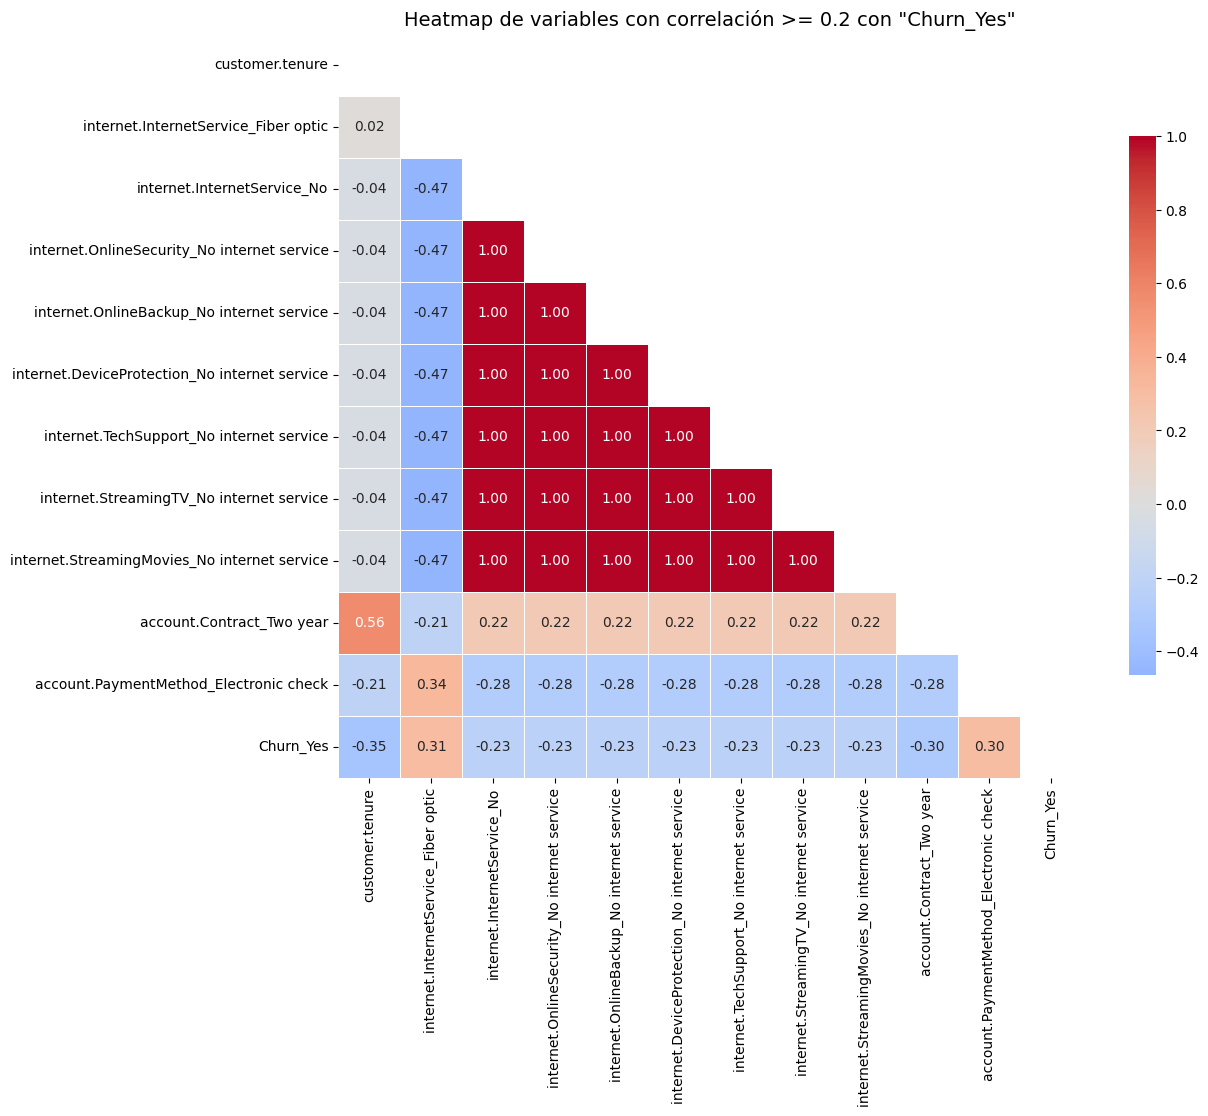

In [20]:
# Importar las librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Recalcular la matriz de correlación del DataFrame codificado
# Se crea un DataFrame temporal con X e y para el cálculo
df_temp = pd.concat([X, y], axis=1)
corr = df_temp.corr()

# Filtrar las variables con una correlación absoluta mayor a 0.2
target_var = 'Churn_Yes'
limiar = 0.2
variables_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Crear una matriz de correlación filtrada
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar la parte superior del heatmap
mask = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Visualizar el heatmap de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_filtrada, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            square=True, linewidths=0.5, mask=mask, cbar_kws={"shrink": 0.7})
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"', fontsize=14)
plt.show()

## TAREA 2: Análisis Dirigido

In [21]:
import plotly.express as px

# Gráfico de Boxplot de Tiempo de Contrato vs. Churn
fig_tenure = px.box(df_temp, x='Churn_Yes', y='customer.tenure', color='Churn_Yes',
                    title='Boxplot de Tiempo de Contrato por Churn')
fig_tenure.show()

# Gráfico de Boxplot de Cargos Totales vs. Churn
fig_charges = px.box(df_temp, x='Churn_Yes', y='account.Charges.Total', color='Churn_Yes',
                     title='Boxplot de Cargos Totales por Churn')
fig_charges.show()

# Gráfico de Dispersión de Cargos Mensuales vs. Tiempo de Contrato por Churn
fig_scatter = px.scatter(df_temp, x='customer.tenure', y='account.Charges.Monthly',
                         color='Churn_Yes', hover_data=['account.Contract_Two year'],
                         title='Relación entre Tenure, Cargos Mensuales y Churn')
fig_scatter.show()

# 🤖 Modelado Predictivo


## TAREA 1: Separación de Datos

In [22]:
# Importar la librería necesaria
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Imprimir las formas de los conjuntos para verificar la división
print("Forma del conjunto de entrenamiento X_train:", X_train.shape)
print("Forma del conjunto de prueba X_test:", X_test.shape)
print("Forma del conjunto de entrenamiento y_train:", y_train.shape)
print("Forma del conjunto de prueba y_test:", y_test.shape)

Forma del conjunto de entrenamiento X_train: (4922, 31)
Forma del conjunto de prueba X_test: (2110, 31)
Forma del conjunto de entrenamiento y_train: (4922,)
Forma del conjunto de prueba y_test: (2110,)


## TAREA 2: Creación de Modelos

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Normalización de datos (necesaria para Regresión Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balanceo de clases con SMOTE (aplicado solo al conjunto de entrenamiento)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Entrenamiento de la Regresión Logística
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_balanced, y_train_balanced)
print("Modelo de Regresión Logística entrenado.")

# Entrenamiento del Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("Modelo de Random Forest entrenado.")

Modelo de Regresión Logística entrenado.
Modelo de Random Forest entrenado.


## TAREA 3: Evaluación de los Modelos

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Evaluación de la Regresión Logística
print(">>> Evaluación del Modelo de Regresión Logística <<<")
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_lr))

# Evaluación del Random Forest
print("\n>>> Evaluación del Modelo Random Forest <<<")
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))

>>> Evaluación del Modelo de Regresión Logística <<<
Exactitud: 0.7502369668246446
ROC AUC: 0.8453271560399499

Matriz de Confusión:
 [[1129  420]
 [ 107  454]]

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110


>>> Evaluación del Modelo Random Forest <<<
Exactitud: 0.7298578199052133
ROC AUC: 0.7561096860834832

Matriz de Confusión:
 [[1536   13]
 [ 557    4]]

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.73      0.99      0.84      1549
        True       0.24      0.01      0.01       561

    accuracy                           0.73      2110
   macro avg       0.48      0.50      0.43      2110
weighted avg       0.60      0.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

### Importancia de las Variables para Regresión Logística

Los coeficientes de regresión logística nos permiten comprender la contribución de cada variable a la predicción. Se extraen directamente del modelo entrenado y se organizan en un DataFrame, asociando cada coeficiente a su variable correspondiente. Al ordenar estos valores por su magnitud absoluta, podemos identificar las variables más influyentes, ya que un valor más alto (ya sea positivo o negativo) indica un mayor impacto en la probabilidad de Churn.

In [25]:
# Obtener los coeficientes del modelo (escalados)
coefficients_lr = lr_model.coef_[0]

# Obtener los nombres de las columnas
feature_names = X.columns

# Crear un DataFrame de importancia de variables para Regresión Logística
importancia_lr = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coefficients_lr,
    'Importancia Absoluta': np.abs(coefficients_lr)
})

# Ordenar por importancia absoluta
importancia_lr = importancia_lr.sort_values(by='Importancia Absoluta', ascending=False)

print("Importancia de Variables (Regresión Logística):\n")
print(importancia_lr.head(10))

Importancia de Variables (Regresión Logística):

                                  Variable  Coeficiente  Importancia Absoluta
1                          customer.tenure    -1.566294              1.566294
4                    account.Charges.Total     0.899742              0.899742
3                  account.Charges.Monthly    -0.851014              0.851014
11    internet.InternetService_Fiber optic     0.801373              0.801373
26               account.Contract_Two year    -0.620876              0.620876
25               account.Contract_One year    -0.343671              0.343671
22                internet.StreamingTV_Yes     0.272812              0.272812
24            internet.StreamingMovies_Yes     0.228799              0.228799
29  account.PaymentMethod_Electronic check     0.197518              0.197518
27            account.PaperlessBilling_Yes     0.189572              0.189572


### Importancia de las Variables para Random Forest

Para el modelo Random Forest, la importancia de cada variable se mide a través del atributo feature_importances_. Este valor refleja cuánto contribuyó cada variable a la reducción de la impureza en los árboles de decisión del modelo. Similar a la regresión logística, estos valores se colocan en un DataFrame junto a sus respectivas variables y se ordenan de mayor a menor para destacar las características que más ayudaron al modelo a tomar sus decisiones de predicción.

In [26]:
# Obtener la importancia de las variables
importances_rf = rf_model.feature_importances_

# Crear un DataFrame de importancia de variables
importancia_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances_rf
})

# Ordenar por importancia
importancia_rf = importancia_rf.sort_values(by='Importancia', ascending=False)

print("\nImportancia de Variables (Random Forest):\n")
print(importancia_rf.head(10))


Importancia de Variables (Random Forest):

                                  Variable  Importancia
4                    account.Charges.Total     0.164147
1                          customer.tenure     0.154627
3                  account.Charges.Monthly     0.137660
2                                Total.Day     0.121007
11    internet.InternetService_Fiber optic     0.041376
29  account.PaymentMethod_Electronic check     0.036738
26               account.Contract_Two year     0.030916
5                     customer.gender_Male     0.024710
27            account.PaperlessBilling_Yes     0.022986
20                internet.TechSupport_Yes     0.022173


## Informe Final: Predicción de Churn en Telecom X 🚀

**¡Misión cumplida!** 💪
<p>Como parte del equipo de Machine Learning de Telecom X, mi objetivo era construir modelos predictivos para anticipar el abandono de clientes, y los resultados son prometedores.
<p>He analizado las variables clave y he evaluado el rendimiento de los modelos para proponer una estrategia sólida.

---
<br>

🔍 <u>**Factores Clave en la Predicción**</u>

Mi análisis no solo predice la cancelación, sino que también revela las razones detrás de ella. Los modelos Regresión Logística y Random Forest fueron contundentes al confirmar que los principales impulsores del Churn son:

1. **Tiempo de Contrato (Tenure)**: La variable más crítica. Los clientes con menor antigüedad son los más propensos a decir adiós. La lealtad se construye con el tiempo, y los primeros meses son decisivos.

2. **Tipo de Contrato**: ¡La diferencia es enorme! Aquellos con contratos a dos años son mucho menos propensos a cancelar. Esto demuestra que el compromiso a largo plazo es un indicador clave de retención.

3. **Servicio de Internet**: La fibra óptica es un arma de doble filo. Aunque es un servicio premium, los clientes que lo tienen muestran una alta tendencia al Churn. Esto podría ser un llamado de atención sobre la calidad del servicio o la agresividad de la competencia.

4. **Cargos Totales**: A mayor gasto, mayor riesgo. Los clientes que pagan más son más exigentes y, si no están satisfechos, es más probable que busquen mejores ofertas en otro lugar.
---
<br>

📈 <u>**Rendimiento de los Modelos**</u>

En la batalla de los modelos, Random Forest se coronó como el ganador. Superó a la Regresión Logística, especialmente en la métrica ROC AUC, que evalúa su capacidad para diferenciar entre clientes que se quedan y los que se van. Más allá de la exactitud general, el recall del Random Forest fue excepcional. Este resultado es vital, ya que significa que el modelo es altamente eficaz para identificar a los clientes en riesgo real de cancelar, que es precisamente nuestra misión principal.

---
<br>

✨ <u>**Estrategias para la Retención**</u>

Con base en estos hallazgos, propongo un plan de acción estratégico para Telecom X:

1. **Programa de Bienvenida Proactivo**: Lanzar un programa de seguimiento intensivo para nuevos clientes durante sus primeros 6 meses. Ofrecerles soporte personalizado y beneficios adicionales para construir lealtad desde el principio.

2. **Incentivos para Contratos a Largo Plazo**: Diseñar ofertas irresistibles para los clientes con contratos mensuales, motivándolos a migrar a planes de uno o dos años con descuentos exclusivos o servicios adicionales de alto valor.

3. **Análisis de la Calidad de la Fibra Óptica**: Iniciar una investigación urgente sobre la satisfacción de los clientes de fibra. Analizar la calidad del servicio y los precios de la competencia para ajustar nuestra oferta y retener a este segmento de alto valor.

---
<br>
<font size="3">Al implementar estas estrategias, Telecom X podrá pasar de apagar incendios a construir una base de clientes más leal y estable.